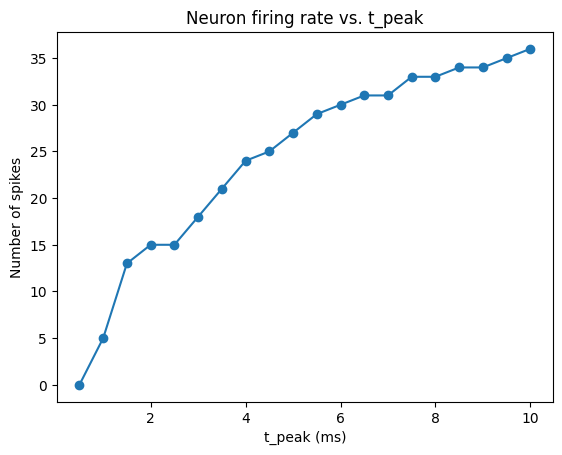

In [1]:
import time
import numpy as np
from numpy import concatenate as cc
import matplotlib.pyplot as plt

np.random.seed(0)
h = 1. # step size, Euler method, = dt ms
t_max= 200 # ms, simulation time period
tstop = int(t_max/h) # number of time steps

thr = 0.9 # threshold for random spikes
spike_train = np.random.rand(tstop) > thr

# capacitance and leak resistance
C = 0.5 # nF
R = 40 # M ohms

# conductance and associated parameters to simulate spike rate adaptation
G_inc = 1/h
tau_ad = 2

# Initialize basic parameters
E_leak = -60 # mV, equilibrium potential
E_syn = 0 # Excitatory synapse
V_th = -40 # spike threshold mV
V_spike = 50 # spike value mV
ref_max = 4/h # Starting value of ref period counter

# Variables to store results
t_peak_values = np.arange(0.5, 10.5, 0.5)
spike_counts = []

for t_peak in t_peak_values:
    # Reset variables for each t_peak
    V = E_leak
    V_trace = [V]
    t_trace = [0]
    ref = 0
    g_ad = 0
    t_list = np.array([], dtype=int)
    
    g_peak = 0.05 # nS (peak synaptic conductance)
    const = g_peak / (t_peak*np.exp(-1))
    t_vec = np.arange(0, 100 + h, h)
    alpha_func = const * t_vec * (np.exp(-t_vec/t_peak))
    
    spike_count = 0
    
    for t in range(tstop):
        if spike_train[t]: 
            t_list = cc([t_list, [1]])

        g_syn = np.sum(alpha_func[t_list])
        I_syn = g_syn*(E_syn - V) 

        if np.any(t_list):
            t_list = t_list + 1
            if t_list[0] == 100: 
                t_list = t_list[1:]

        if not ref:
            V = V + h*(-((V-E_leak)*(1+R*g_ad)/(R*C)) + (I_syn/C))
            g_ad = g_ad + h*(-g_ad/tau_ad) 
        else:
            ref -= 1
            V = V_th - 10 
            g_ad = 0

        if (V > V_th) and not ref:
            V = V_spike
            ref = ref_max
            g_ad = g_ad + G_inc
            spike_count += 1

        V_trace += [V]
        t_trace += [t*h]
    
    spike_counts.append(spike_count)

# Plot the results
plt.plot(t_peak_values, spike_counts, marker='o')
plt.xlabel('t_peak (ms)')
plt.ylabel('Number of spikes')
plt.title('Neuron firing rate vs. t_peak')
plt.show()


In [6]:
import numpy as np

# Define the weight matrix W
W = np.array([[0.6, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.6, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.6, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.6, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.6]])

# Define the input vector u
u = np.array([0.6, 0.5, 0.6, 0.2, 0.1])

# Define the recurrent weight matrix M
M = np.array([[-0.125, 0, 0.125, 0.125, 0],
              [0, -0.125, 0.125, 0.125, 0],
              [0.125, 0, -0.125, 0, 0.125],
              [0.125, 0.125, 0, -0.125, 0],
              [0, 0.125, 0.125, 0, -0.125]])

# Identity matrix
I = np.eye(5)

# Calculate (I - M)
I_minus_M = I - M

# Calculate W * u
Wu = np.dot(W, u)

# Calculate the steady-state output vector v_ss
v_ss = np.dot(np.linalg.inv(I_minus_M), Wu)

# Print the steady-state output vector
print("Steady-state output vector v_ss:", v_ss)


Steady-state output vector v_ss: [0.54735866 0.50291421 0.54286428 0.38336365 0.33841983]
